# House Price V1

Kaggle Problem: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


- Feature Engineering
- Random Forest
- XGB
- LightGBM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

House_Price.ipynb        submission_baseline.csv  test.csv
data_description.txt     submission_rf_v2.csv     test1.ipynb
sample_submission.csv    submission_xgb.csv       train.csv


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
pd.set_option('display.max_columns', None)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [7]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

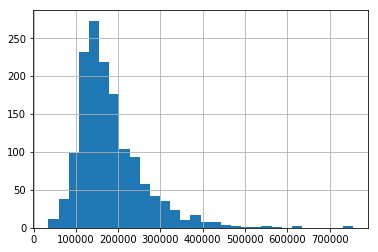

In [8]:
df_train.SalePrice.hist(bins=30)

In [9]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [10]:
df_train.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Check Categorical, Integer and Float Features

In [11]:
cate_list = list(df_train.select_dtypes('object').columns)
cate_value = []
missing = []

for cate in cate_list:    
    cate_value.append(len(df_train[cate].unique()))
    missing.append(df_train[cate].isnull().sum())
    
df_cate = pd.DataFrame({'category':cate_list, 'value':cate_value, 'missing':missing})\
        .sort_values('value',ascending=False)
df_cate

,category,value,missing
8,Neighborhood,25,0
16,Exterior2nd,16,0
15,Exterior1st,15,0
41,SaleType,9,0
9,Condition1,9,0
10,Condition2,8,0
12,HouseStyle,8,0
14,RoofMatl,8,0
25,BsmtFinType2,7,38
31,Functional,7,0


In [12]:
int_list = list(df_train.select_dtypes('int').columns)
int_value = []
int_missing = []

for int in int_list:    
    int_value.append(len(df_train[int].unique()))
    int_missing.append(df_train[int].isnull().sum())
    
df_int = pd.DataFrame({'int':int_list, 'value':int_value, 'missing':int_missing})\
        .sort_values('value',ascending=False)
df_int

,int,value,missing
0,Id,1460,0
2,LotArea,1073,0
14,GrLivArea,861,0
9,BsmtUnfSF,780,0
11,1stFlrSF,753,0
10,TotalBsmtSF,721,0
34,SalePrice,663,0
7,BsmtFinSF1,637,0
24,GarageArea,441,0
12,2ndFlrSF,417,0


In [13]:
float_list = list(df_train.select_dtypes('float').columns)
float_value = []
float_missing = []

for float in float_list:    
    float_value.append(len(df_train[float].unique()))
    float_missing.append(df_train[float].isnull().sum())
    
df_float = pd.DataFrame({'float':float_list, 'value':float_value, 'missing':float_missing})\
        .sort_values('value',ascending=False)
df_float

,float,value,missing
1,MasVnrArea,328,8
0,LotFrontage,111,259
2,GarageYrBlt,98,81


# Feature Engineering

In [14]:
train_ids = df_train['Id']
test_ids = df_test['Id']

labels = df_train['SalePrice']

In [15]:
train = df_train.drop('Id', axis=1)
test = df_test.drop('Id', axis=1)

print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [16]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(1460, 289)
(1459, 270)


# Correlation

In [17]:
correlations = train.corr()['SalePrice'].sort_values()

In [18]:
# Most Positive Correlations:

correlations.tail(15)

GarageYrBlt         0.486362
Foundation_PConc    0.497734
KitchenQual_Ex      0.504094
YearRemodAdd        0.507101
YearBuilt           0.522897
TotRmsAbvGrd        0.533723
BsmtQual_Ex         0.553105
FullBath            0.560664
1stFlrSF            0.605852
TotalBsmtSF         0.613581
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [19]:
# Most Negative Correlations

correlations.head(15)

ExterQual_TA        -0.589044
KitchenQual_TA      -0.519298
BsmtQual_TA         -0.452394
GarageFinish_Unf    -0.410608
MasVnrType_None     -0.374468
GarageType_Detchd   -0.354141
Foundation_CBlock   -0.343263
HeatingQC_TA        -0.312677
MSZoning_RM         -0.288065
LotShape_Reg        -0.267672
BsmtExposure_No     -0.263600
CentralAir_N        -0.251328
SaleType_WD         -0.242598
RoofStyle_Gable     -0.224744
PavedDrive_N        -0.212630
Name: SalePrice, dtype: float64

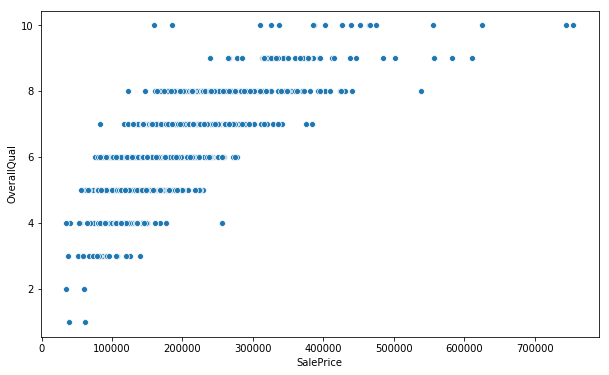

In [20]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="OverallQual", data=train)
plt.show()

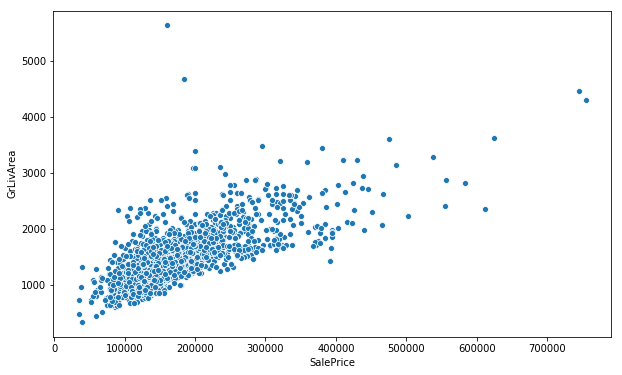

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="GrLivArea", data=train)
plt.show()

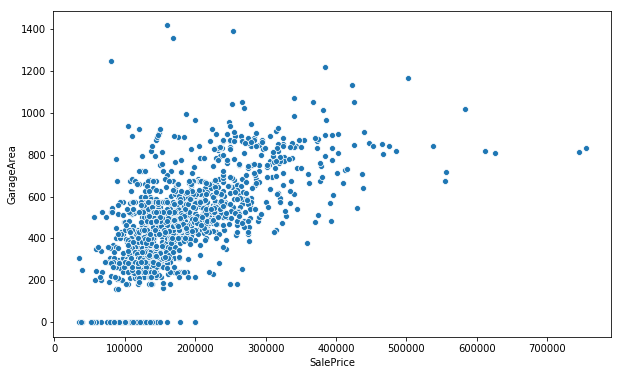

In [22]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="GarageArea", data=train)
plt.show()

# Collinear Feature

In [23]:
# Align the dataframes by the columns
train, test = train.align(test, join = 'inner', axis = 1)

print(train.shape)
print(test.shape)

(1460, 270)
(1459, 270)


In [24]:
corrs = train.corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    
    #print(col)
    #print(list(corrs.index[corrs[col] > threshold]))
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [25]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    
    #print(key,value)
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
                
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
cols_to_remove_pair = list(set(cols_to_remove_pair))
print('Number of columns to remove pair: ', len(cols_to_remove_pair))

cols_to_remove

Number of columns to remove:  16
Number of columns to remove pair:  16


['GarageYrBlt',
 'SaleCondition_Partial',
 'Neighborhood_Somerst',
 'Exterior2nd_HdBoard',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'MiscFeature_Gar2',
 'Exterior2nd_VinylSd',
 'Exterior2nd_MetalSd',
 'HouseStyle_2Story',
 'GarageArea',
 '1stFlrSF',
 'RoofMatl_Tar&Grv',
 'Exterior2nd_AsbShng',
 'Exterior2nd_Wd Sdng',
 'TotRmsAbvGrd']

In [26]:
train = train.drop(columns = cols_to_remove)
test = test.drop(columns = cols_to_remove)

print(train.shape)
print(test.shape)

(1460, 254)
(1459, 254)


# Machine Learning Modeling

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train = imputer.fit_transform(train)
test = imputer.fit_transform(test)


scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

## Baseline Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state=43)

rf.fit(train,labels)
prediction = rf.predict(test)

In [29]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': prediction})
submission

,Id,SalePrice
0,1461,125147.130523
1,1462,153676.057966
2,1463,179678.936840
3,1464,180280.691461
4,1465,199101.188792
5,1466,181214.707479
6,1467,168692.936789
7,1468,175921.254118
8,1469,182156.540922
9,1470,120629.523209


In [30]:
submission.to_csv('submission_baseline.csv',index=False)

## k-fold

In [31]:
from sklearn.model_selection import KFold
import sklearn.metrics


n_folds = 5

k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)

i = 0

predictions = np.zeros(test.shape[0])

for train_indices, valid_indices in k_fold.split(train):
    
    # Training data for the fold
    train_features, train_labels = train[train_indices], labels[train_indices]
    
    # Validation data for the fold
    valid_features, valid_labels = train[valid_indices], labels[valid_indices]
    
    rf = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state=43)
    rf.fit(train_features, train_labels)
    valid_pred = rf.predict(valid_features)
    
    print(i, "R2 Score: ", sklearn.metrics.r2_score(valid_pred,valid_labels))
    
    predictions += rf.predict(test)/k_fold.n_splits
    
    i+=1 

0 R2 Score:  0.8458514843876088
1 R2 Score:  0.8173841093423172
2 R2 Score:  0.799273142656877
3 R2 Score:  0.8577693743477389
4 R2 Score:  0.76942496542911


In [32]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions})
submission

,Id,SalePrice
0,1461,125638.650092
1,1462,154725.240154
2,1463,179141.014398
3,1464,182302.055925
4,1465,196788.545574
5,1466,182285.836628
6,1467,168034.444408
7,1468,175866.658985
8,1469,181619.259403
9,1470,121953.968324


In [33]:
submission.to_csv('submission_rf_v2.csv',index=False)

# XGBoost

In [34]:
import xgboost

In [35]:
n_folds = 5

k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)

i = 0

predictions = np.zeros(test.shape[0])

for train_indices, valid_indices in k_fold.split(train):
    
    # Training data for the fold
    train_features, train_labels = train[train_indices], labels[train_indices]
    
    # Validation data for the fold
    valid_features, valid_labels = train[valid_indices], labels[valid_indices]
    
    xgb = xgboost.XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75,
                               colsample_bytree=1, max_depth=10)
    xgb.fit(train_features, train_labels)
    valid_pred = xgb.predict(valid_features)
    
    print(i, "R2 Score: ", sklearn.metrics.r2_score(valid_pred,valid_labels))
    
    predictions += xgb.predict(test)/k_fold.n_splits
    
    i+=1

[00:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0 R2 Score:  0.8831383581935149
[00:15:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1 R2 Score:  0.8297285308053137
[00:15:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


2 R2 Score:  0.8273055623546945
[00:15:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


3 R2 Score:  0.8430642846909049
[00:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


4 R2 Score:  0.8577312839187976


In [36]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions})
submission.to_csv('submission_xgb.csv',index=False)

# LightGBM

In [37]:
import lightgbm as lgb

In [50]:
n_folds = 5

k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)

i = 0

predictions = np.zeros(test.shape[0])

for train_indices, valid_indices in k_fold.split(train):
    
    # Training data for the fold
    train_features, train_labels = train[train_indices], labels[train_indices]
    
    # Validation data for the fold
    valid_features, valid_labels = train[valid_indices], labels[valid_indices]
    
    
    # Create the model
    
    model = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.15, n_estimators=20000, max_depth=5,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.1)


    # Train the model
    model.fit(train_features, train_labels, eval_metric = 'rmse',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], early_stopping_rounds = 100, verbose = 200)

    # Record the best iteration
    best_iteration = model.best_iteration_
    
    
    valid_pred = model.predict(valid_features)
    
    print(i, "R2 Score: ", sklearn.metrics.r2_score(valid_pred,valid_labels))
    
    predictions += model.predict(test)/k_fold.n_splits
    
    i+=1

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	train's rmse: 14992.9	valid's rmse: 23561.7
0 R2 Score:  0.8901227934639943
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's rmse: 18810.3	valid's rmse: 31371.1
1 R2 Score:  0.8443375879004885
Training until validation scores don't improve for 100 rounds
[200]	train's rmse: 8769.62	valid's rmse: 29857.6
Early stopping, best iteration is:
[130]	train's rmse: 11702.3	valid's rmse: 29335.5
2 R2 Score:  0.8407357559371099
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	train's rmse: 19365.5	valid's rmse: 21811.9
3 R2 Score:  0.885434956230724
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	train's rmse: 14248	valid's rmse: 31687.4
4 R2 Score:  0.8228879229444039


In [51]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions})
submission.to_csv('submission_lightgbm_v1.csv',index=False)